In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [4]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set(style = 'white')
plt.rcParams.update({'text.color': "black"})

# AGX

In [37]:
accuracy_list = dict()

In [38]:
def calculatePercentiles(df):
    model=df["model"][0]
    print(model)
    correct=int(df['class'].count())
    total = len(df['class'])
    accuracy_list[model]=(round(correct/total,3),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)

### Small

In [6]:
# folder = "yolov11_x"
# filename = "bad_light"
filename = "resized"
device = "AGX"

df_combined=pd.DataFrame()

for folder in ["new_yolov11_nano_100_epochs","new_yolov11_medium_100_epochs","new_yolov11_x_100_epochs"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/outputs/{device}/{folder}/output_inference_time/{filename}.csv")
    df_temp['run']*=1000
    df_temp["model"] = folder
    calculatePercentiles(df_temp)
    df_combined = pd.concat([df_combined, df_temp[["run", "model"]]])

df_combined.reset_index(drop=True)
# print(df_combined.head(10))
# print(df_combined.tail(10))
# print("Total rows : ",len(df_combined))

new_yolov11_nano_100_epochs
Total Correct Predictions :  928
Total Rows :  1000
new_yolov11_medium_100_epochs
Total Correct Predictions :  952
Total Rows :  1000
new_yolov11_x_100_epochs
Total Correct Predictions :  949
Total Rows :  1000


,run,model
0,1721.727371,new_yolov11_nano_100_epochs
1,58.324814,new_yolov11_nano_100_epochs
2,36.489725,new_yolov11_nano_100_epochs
3,39.233685,new_yolov11_nano_100_epochs
4,68.103313,new_yolov11_nano_100_epochs
...,...,...
2995,306.349277,new_yolov11_x_100_epochs
2996,304.312229,new_yolov11_x_100_epochs
2997,304.913044,new_yolov11_x_100_epochs
2998,304.893017,new_yolov11_x_100_epochs


In [7]:
print(accuracy_list)

{'new_yolov11_nano_100_epochs': (928, 1000), 'new_yolov11_medium_100_epochs': (952, 1000), 'new_yolov11_x_100_epochs': (949, 1000)}


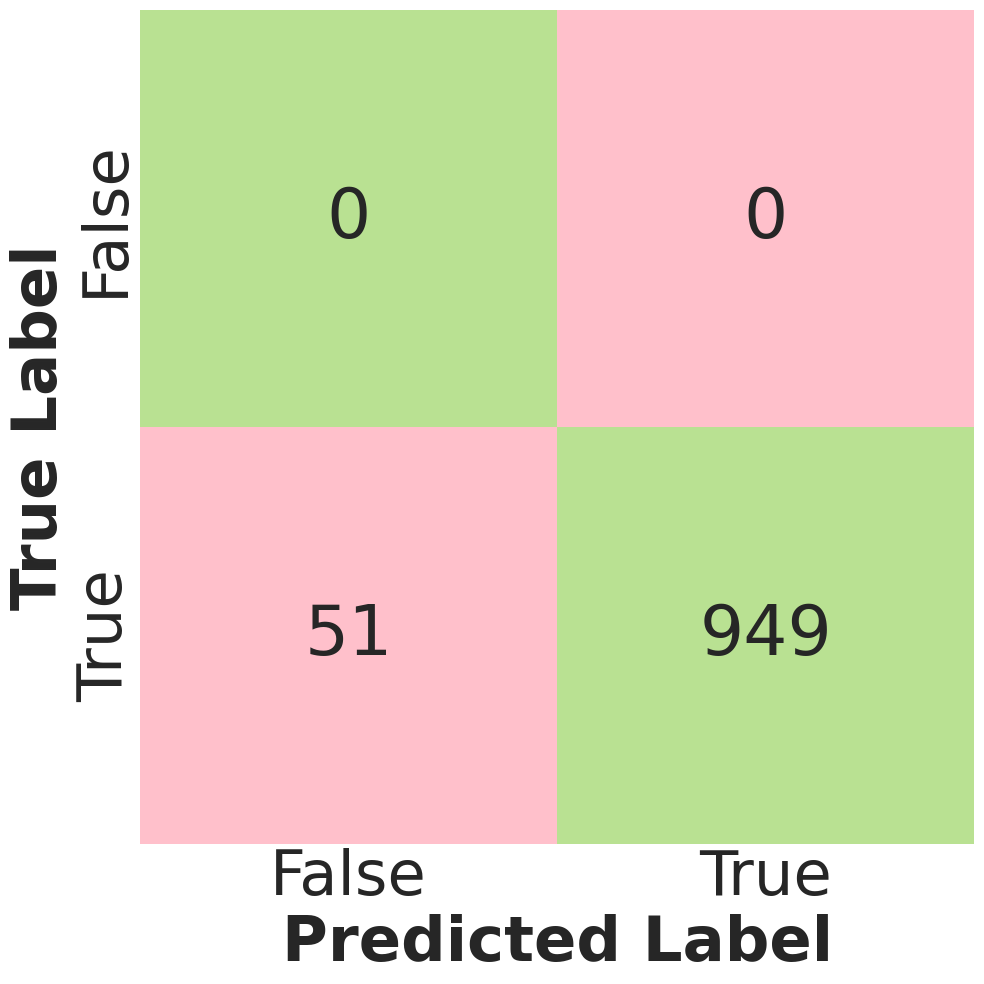

In [10]:
# YOLOv11n
cm1 = np.array([[0, 0],
               [accuracy_list['new_yolov11_nano_100_epochs'][1]-accuracy_list['new_yolov11_nano_100_epochs'][0], accuracy_list['new_yolov11_nano_100_epochs'][0]]])

# YOLOv11m
cm2 = np.array([[0, 0],
               [accuracy_list['new_yolov11_medium_100_epochs'][1]-accuracy_list['new_yolov11_medium_100_epochs'][0], accuracy_list['new_yolov11_medium_100_epochs'][0]]])

# YOLOv11x
cm3 = np.array([[0, 0],
               [accuracy_list['new_yolov11_x_100_epochs'][1]-accuracy_list['new_yolov11_x_100_epochs'][0], accuracy_list['new_yolov11_x_100_epochs'][0]]])


fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(np.eye(2),
            annot = cm3,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['False', 'True'],
            xticklabels = ['False', 'True'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/{device}/small/new_yolov11_x_100_epochs.png", bbox_inches="tight")

plt.tight_layout()
plt.show()

### For combining outputs from different folders for Homogeneous dataset

In [39]:
accuracy_list = dict()

In [40]:
def calculatePercentilesAllFolder(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)

In [41]:
df_all_model_combined = pd.DataFrame()

for folder in ["new_yolov11_nano_50_epochs","new_yolov11_medium_50_epochs","new_yolov11_x_50_epochs"]:
# for folder in ["yolov11_nano","yolov11_medium","yolov11_x"]:
    df_folder_combined=pd.DataFrame()
    for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
        df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
        df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
    df_folder_combined["model"] = folder
    calculatePercentilesAllFolder(df_folder_combined, folder)
    df_all_model_combined = pd.concat([df_all_model_combined, df_folder_combined])
    

df_all_model_combined.reset_index(drop=True, inplace=True)
# print(df_combined.head(10))
# print(df_combined.tail(10))
# print("Total rows : ",len(df_combined))

new_yolov11_nano_50_epochs
Total Correct Predictions :  23353
Total Rows :  23554
new_yolov11_medium_50_epochs
Total Correct Predictions :  23398
Total Rows :  23554
new_yolov11_x_50_epochs
Total Correct Predictions :  23307
Total Rows :  23554


In [42]:
print(accuracy_list)

{'new_yolov11_nano_50_epochs': (99.15, 23353, 23554), 'new_yolov11_medium_50_epochs': (99.34, 23398, 23554), 'new_yolov11_x_50_epochs': (98.95, 23307, 23554)}


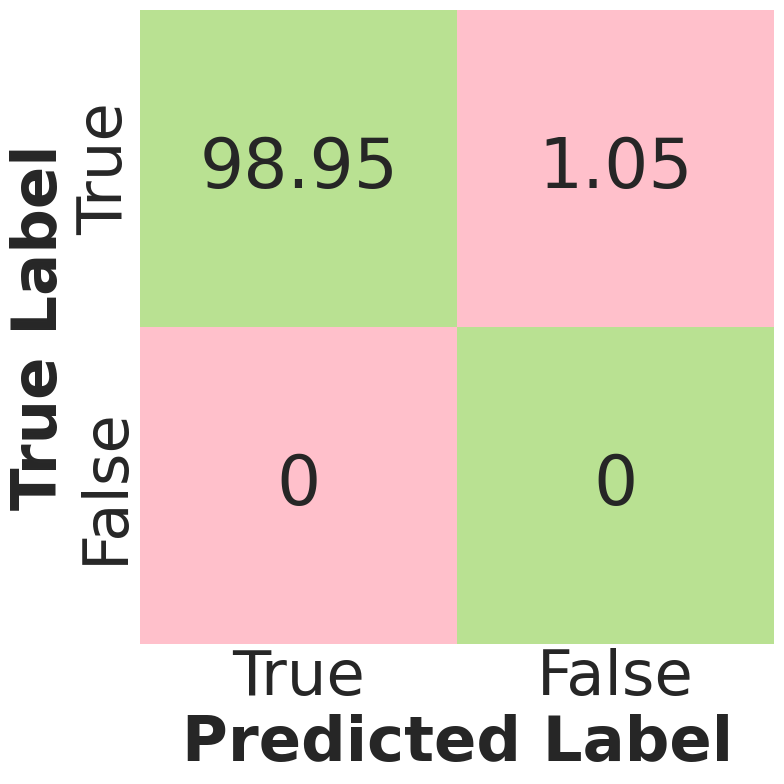

In [45]:
# YOLOv11n
cm1 = np.array([[accuracy_list['new_yolov11_nano_50_epochs'][0], 100 - accuracy_list['new_yolov11_nano_50_epochs'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['new_yolov11_medium_50_epochs'][0], 100 - accuracy_list['new_yolov11_medium_50_epochs'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['new_yolov11_x_50_epochs'][0], 100 - accuracy_list['new_yolov11_x_50_epochs'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm3,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_n_new.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_n_new.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_m_new.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_m_new.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_x_new.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_x_new.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

### Adversarial Data

In [46]:
accuracy_list = dict()

In [47]:
def calculatePercentiles(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)

In [48]:
# folder = "yolov11_x"
filename = "bad_light"
# filename = "resized"
device = "AGX"

# df_8_nano["run"]*=1000 
df_combined=pd.DataFrame()

for folder in ["new_yolov11_nano_50_epochs","new_yolov11_medium_50_epochs","new_yolov11_x_50_epochs"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
    df_temp['run']*=1000
    df_temp["model"] = folder
    calculatePercentiles(df_temp, folder)
    df_combined = pd.concat([df_combined, df_temp[["run", "model"]]])

df_combined.reset_index(drop=True)
# print(df_combined.head(10))
# print(df_combined.tail(10))
# print("Total rows : ",len(df_combined))

new_yolov11_nano_50_epochs
Total Correct Predictions :  3780
Total Rows :  3806
new_yolov11_medium_50_epochs
Total Correct Predictions :  3786
Total Rows :  3806
new_yolov11_x_50_epochs
Total Correct Predictions :  3731
Total Rows :  3806


,run,model
0,1703.604698,new_yolov11_nano_50_epochs
1,63.296795,new_yolov11_nano_50_epochs
2,38.445950,new_yolov11_nano_50_epochs
3,66.810369,new_yolov11_nano_50_epochs
4,38.814783,new_yolov11_nano_50_epochs
...,...,...
11413,306.229830,new_yolov11_x_50_epochs
11414,304.909706,new_yolov11_x_50_epochs
11415,306.371927,new_yolov11_x_50_epochs
11416,310.152769,new_yolov11_x_50_epochs


In [49]:
print(accuracy_list)

{'new_yolov11_nano_50_epochs': (99.32, 3780, 3806), 'new_yolov11_medium_50_epochs': (99.47, 3786, 3806), 'new_yolov11_x_50_epochs': (98.03, 3731, 3806)}


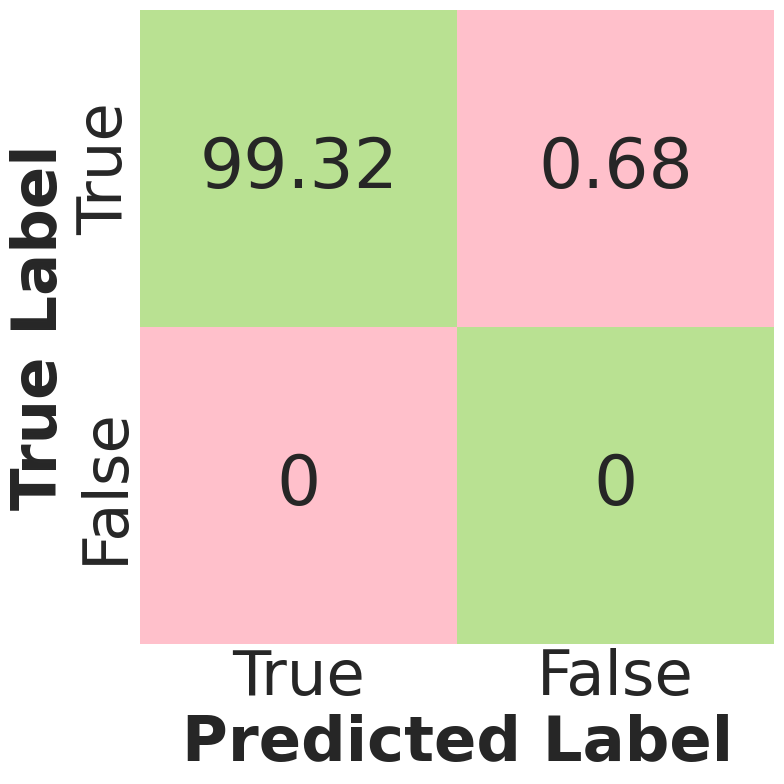

In [52]:
# YOLOv11n
cm1 = np.array([[accuracy_list['new_yolov11_nano_50_epochs'][0], 100 - accuracy_list['new_yolov11_nano_50_epochs'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['new_yolov11_medium_50_epochs'][0], 100 - accuracy_list['new_yolov11_medium_50_epochs'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['new_yolov11_x_50_epochs'][0], 100 - accuracy_list['new_yolov11_x_50_epochs'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm1,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_n_new.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_n_new.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_m_new.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_m_new.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_x_new.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_x_new.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

## Old YOLOv11

### Homogeneous

In [43]:
accuracy_list = dict()

In [40]:
def calculatePercentilesAllFolder(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)

def getFolderName(folder):
    if folder == "resized_new_yolov11_n_50_epochs":
        return "yolov11_nano"
    elif folder == "resized_new_yolov11_m_50_epochs":
        return "yolov11_medium"
    elif folder == "yolov11_x":
        return "yolov11_xLarge"

In [44]:
df_all_model_combined = pd.DataFrame()

for folder in ["resized_new_yolov11_n_50_epochs","resized_new_yolov11_m_50_epochs"]:
    df_folder_combined=pd.DataFrame()
    for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
        df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
        df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
    df_folder_combined["model"] = getFolderName(folder)
    calculatePercentilesAllFolder(df_folder_combined, getFolderName(folder))
    df_all_model_combined = pd.concat([df_all_model_combined, df_folder_combined])
    

df_all_model_combined.reset_index(drop=True, inplace=True)

yolov11_nano
Total Correct Predictions :  22527
Total Rows :  23554
yolov11_medium
Total Correct Predictions :  20629
Total Rows :  23554


In [45]:
print(accuracy_list)

{'yolov11_nano': (95.64, 22527, 23554), 'yolov11_medium': (87.58, 20629, 23554)}


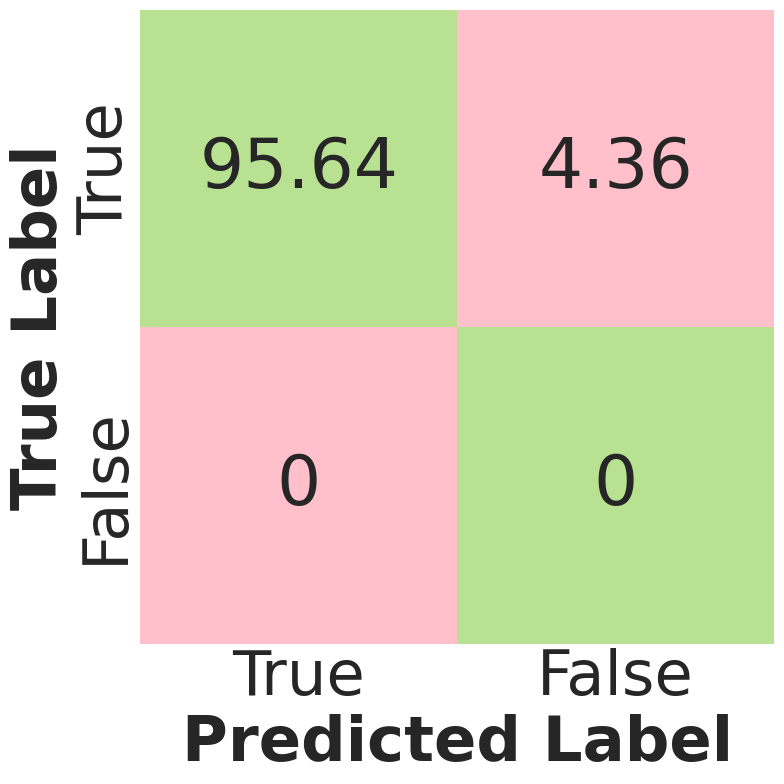

In [47]:
# YOLOv11n
cm1 = np.array([[accuracy_list['yolov11_nano'][0], 100 - accuracy_list['yolov11_nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['yolov11_medium'][0], 100 - accuracy_list['yolov11_medium'][0]],
                [0, 0]])

# YOLOv11x
# cm3 = np.array([[accuracy_list['yolov11_x'][0], 100 - accuracy_list['yolov11_x'][0]],
#                 [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm1,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_n_50_epochs_old.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_n_50_epochs_old.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_m_50_epochs_old.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_m_50_epochs_old.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_x_50_epochs_old.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov11_x_50_epochs_old.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

### Adversarial

In [31]:
accuracy_list = dict()

In [32]:
def calculatePercentiles(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)

def getFolderName(folder):
    if folder == "resized_new_yolov11_n_50_epochs":
        return "yolov11_nano"
    elif folder == "resized_new_yolov11_m_50_epochs":
        return "yolov11_medium"
    elif folder == "yolov11_x":
        return "yolov11_xLarge"

In [33]:
filename = "bad_light"
df_combined=pd.DataFrame()

for folder in ["resized_new_yolov11_n_50_epochs","resized_new_yolov11_m_50_epochs"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
    df_temp['run']*=1000
    df_temp["model"] = getFolderName(folder)
    calculatePercentiles(df_temp, getFolderName(folder))
    df_combined = pd.concat([df_combined, df_temp[["run", "model"]]])

df_combined.reset_index(drop=True)

yolov11_nano
Total Correct Predictions :  3311
Total Rows :  3806
yolov11_medium
Total Correct Predictions :  2825
Total Rows :  3806


,run,model
0,1648.941278,yolov11_nano
1,66.857815,yolov11_nano
2,39.324045,yolov11_nano
3,40.110111,yolov11_nano
4,68.459749,yolov11_nano
...,...,...
7607,127.082825,yolov11_medium
7608,126.748800,yolov11_medium
7609,126.402617,yolov11_medium
7610,130.211830,yolov11_medium


In [34]:
print(accuracy_list)

{'yolov11_nano': (86.99, 3311, 3806), 'yolov11_medium': (74.22, 2825, 3806)}


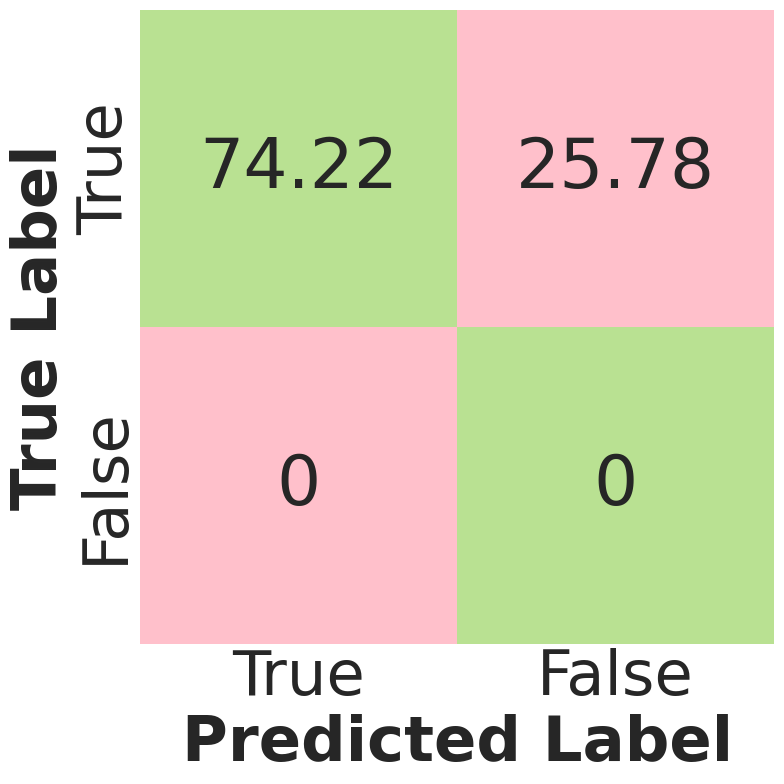

In [37]:
# YOLOv11n
cm1 = np.array([[accuracy_list['yolov11_nano'][0], 100 - accuracy_list['yolov11_nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['yolov11_medium'][0], 100 - accuracy_list['yolov11_medium'][0]],
                [0, 0]])

# YOLOv11x
# cm3 = np.array([[accuracy_list['yolov11_x'][0], 100 - accuracy_list['yolov11_x'][0]],
#                 [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm2,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_n_50_epochs_old.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_n_50_epochs_old.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_m_50_epochs_old.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_m_50_epochs_old.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_x_50_epochs_old.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov11_x_50_epochs_old.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

## YOLOv8

### Adversarial Data

In [106]:
accuracy_list = dict()

In [108]:
def calculatePercentiles(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)

In [109]:
filename = "bad_light"
df_combined=pd.DataFrame()

for folder in ["yolov8_nano","yolov8_medium","yolov8_x"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
    df_temp['run']*=1000
    df_temp["model"] = folder
    calculatePercentiles(df_temp, folder)
    df_combined = pd.concat([df_combined, df_temp[["run", "model"]]])

df_combined.reset_index(drop=True)

yolov8_nano
Total Correct Predictions :  3592
Total Rows :  3806
yolov8_medium
Total Correct Predictions :  3627
Total Rows :  3806
yolov8_x
Total Correct Predictions :  3741
Total Rows :  3806


,run,model
0,110.05,yolov8_nano
1,26.99,yolov8_nano
2,28.91,yolov8_nano
3,28.78,yolov8_nano
4,28.78,yolov8_nano
...,...,...
11413,108.36,yolov8_x
11414,108.38,yolov8_x
11415,108.35,yolov8_x
11416,108.49,yolov8_x


In [110]:
accuracy_list

{'yolov8_nano': (94.38, 3592, 3806),
 'yolov8_medium': (95.3, 3627, 3806),
 'yolov8_x': (98.29, 3741, 3806)}

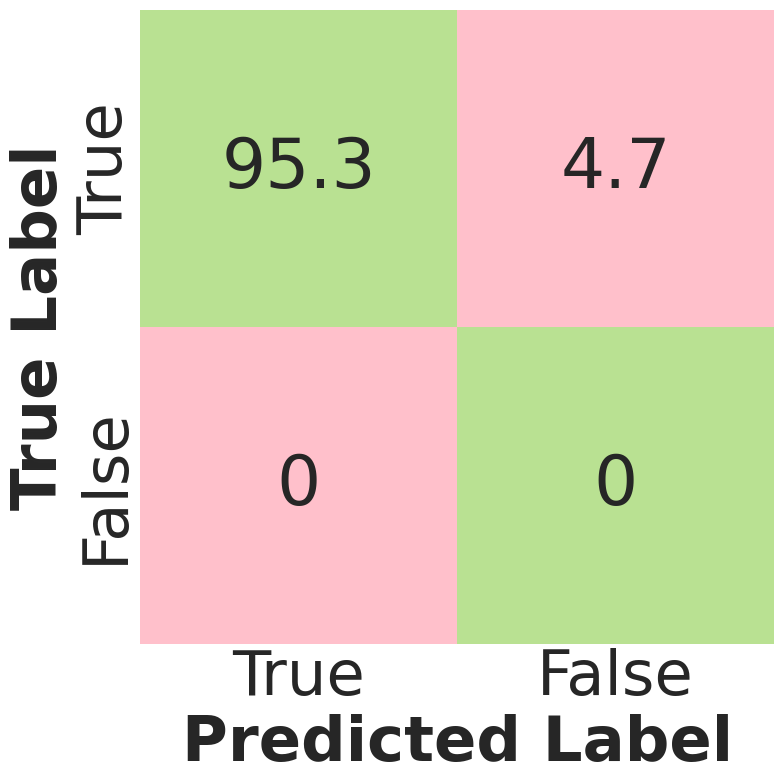

In [111]:
# YOLOv11n
cm1 = np.array([[accuracy_list['yolov8_nano'][0], 100 - accuracy_list['yolov8_nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['yolov8_medium'][0], 100 - accuracy_list['yolov8_medium'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['yolov8_x'][0], 100 - accuracy_list['yolov8_x'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm2,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov8_n.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov8_n.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov8_m.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov8_m.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov8_x.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/yolov8_x.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

### Homogeneous

In [112]:
accuracy_list = dict()

In [113]:
def calculatePercentilesAllFolder(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)

In [114]:
df_all_model_combined = pd.DataFrame()

for folder in ["yolov8_nano","yolov8_medium","yolov8_x"]:
    df_folder_combined=pd.DataFrame()
    for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
        df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
        df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
    df_folder_combined["model"] = folder
    calculatePercentilesAllFolder(df_folder_combined, folder)
    df_all_model_combined = pd.concat([df_all_model_combined, df_folder_combined])
    

df_all_model_combined.reset_index(drop=True, inplace=True)

yolov8_nano
Total Correct Predictions :  23341
Total Rows :  23554
yolov8_medium
Total Correct Predictions :  23379
Total Rows :  23554
yolov8_x
Total Correct Predictions :  23430
Total Rows :  23554


In [115]:
accuracy_list

{'yolov8_nano': (99.1, 23341, 23554),
 'yolov8_medium': (99.26, 23379, 23554),
 'yolov8_x': (99.47, 23430, 23554)}

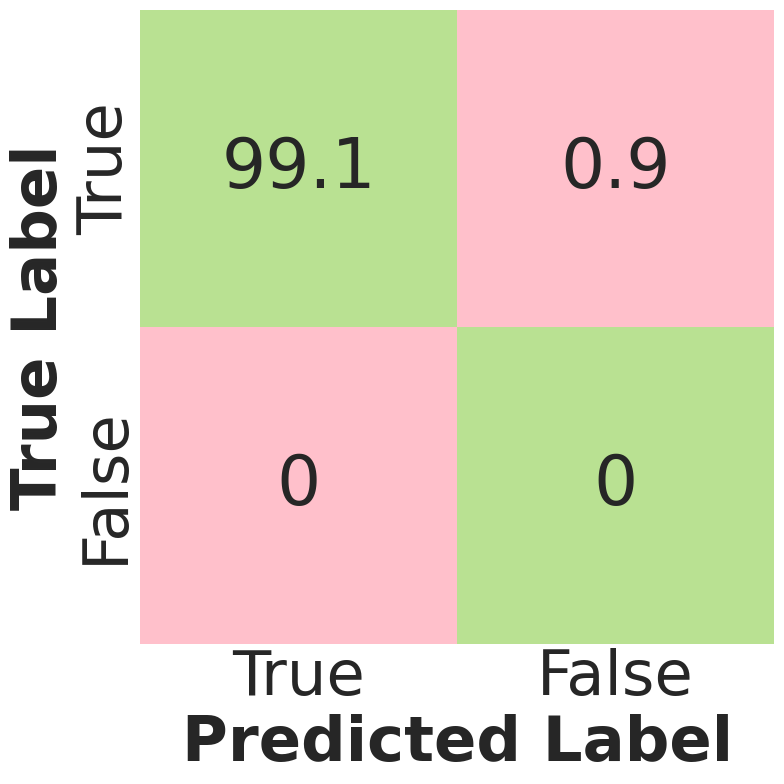

In [116]:
# YOLOv11n
cm1 = np.array([[accuracy_list['yolov8_nano'][0], 100 - accuracy_list['yolov8_nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['yolov8_medium'][0], 100 - accuracy_list['yolov8_medium'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['yolov8_x'][0], 100 - accuracy_list['yolov8_x'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm1,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov8_n.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov8_n.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov8_m.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov8_m.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov8_x.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/yolov8_x.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

## End here

# New Custom Trained YOLOv11 - 100 epochs

## Adversarial

In [11]:
def calculatePercentiles(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)
    
def getFolderName(folder):
    if folder == "scratch_yolov11n_100_epochs":
        return "YOLOv11_Nano"
    elif folder == "scratch_yolov11m_100_epochs":
        return "YOLOv11_Medium"
    else:
        return "YOLOv11_XLarge"

In [12]:
accuracy_list = dict()

filename = "bad_light"
df_combined=pd.DataFrame()

for folder in ["scratch_yolov11n_100_epochs","scratch_yolov11m_100_epochs","scratch_yolov11x_100_epochs"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
    df_temp['run']*=1000
    df_temp["model"] = getFolderName(folder)
    calculatePercentiles(df_temp, getFolderName(folder))
    df_combined = pd.concat([df_combined, df_temp[["run", "model"]]])

df_combined.reset_index(drop=True)
print(accuracy_list)

YOLOv11_Nano
Total Correct Predictions :  3552
Total Rows :  3806
YOLOv11_Medium
Total Correct Predictions :  3757
Total Rows :  3806
YOLOv11_XLarge
Total Correct Predictions :  3772
Total Rows :  3806
{'YOLOv11_Nano': (93.33, 3552, 3806), 'YOLOv11_Medium': (98.71, 3757, 3806), 'YOLOv11_XLarge': (99.11, 3772, 3806)}


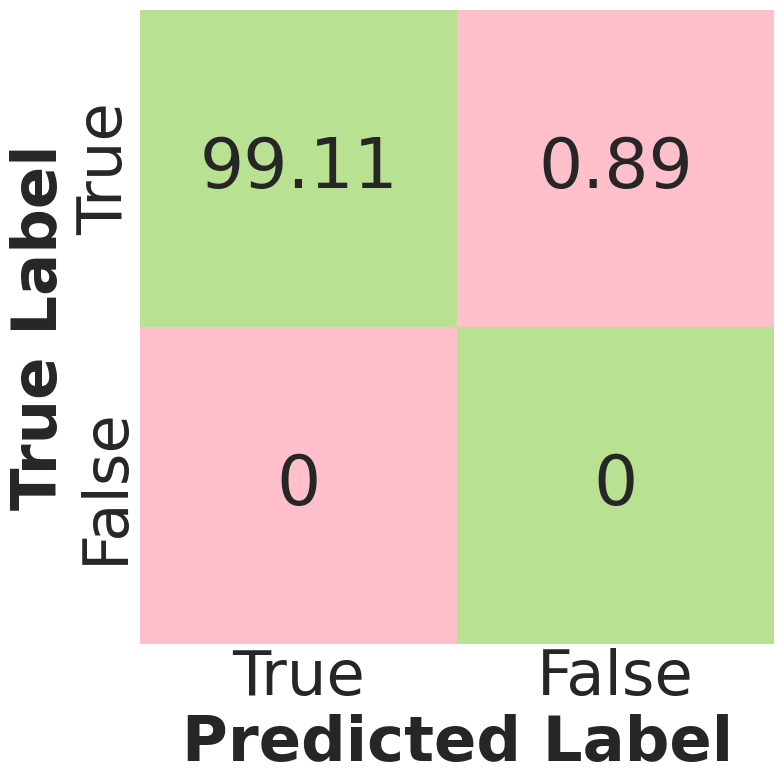

In [13]:
# YOLOv11n
cm1 = np.array([[accuracy_list['YOLOv11_Nano'][0], 100 - accuracy_list['YOLOv11_Nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['YOLOv11_Medium'][0], 100 - accuracy_list['YOLOv11_Medium'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['YOLOv11_XLarge'][0], 100 - accuracy_list['YOLOv11_XLarge'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm3,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_n_100_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_n_100_epochs.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_m_100_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_m_100_epochs.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_x_100_epochs.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_x_100_epochs.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

## Diverse

In [3]:
def calculatePercentilesAllFolder(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)

def getFolderName(folder):
    if folder == "scratch_yolov11n_100_epochs":
        return "YOLOv11_Nano"
    elif folder == "scratch_yolov11m_100_epochs":
        return "YOLOv11_Medium"
    else:
        return "YOLOv11_XLarge"

In [4]:
df_all_model_combined = pd.DataFrame()
accuracy_list = dict()

for folder in ["scratch_yolov11n_100_epochs", "scratch_yolov11m_100_epochs", "scratch_yolov11x_100_epochs"]:
    df_folder_combined=pd.DataFrame()
    for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
        df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
        df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
    df_folder_combined["model"] = getFolderName(folder)
    calculatePercentilesAllFolder(df_folder_combined, getFolderName(folder))
    df_all_model_combined = pd.concat([df_all_model_combined, df_folder_combined])
    

df_all_model_combined.reset_index(drop=True, inplace=True)
print(accuracy_list)

YOLOv11_Nano
Total Correct Predictions :  23240
Total Rows :  23554
YOLOv11_Medium
Total Correct Predictions :  23435
Total Rows :  23554
YOLOv11_XLarge
Total Correct Predictions :  23382
Total Rows :  23554
{'YOLOv11_Nano': (98.67, 23240, 23554), 'YOLOv11_Medium': (99.49, 23435, 23554), 'YOLOv11_XLarge': (99.27, 23382, 23554)}


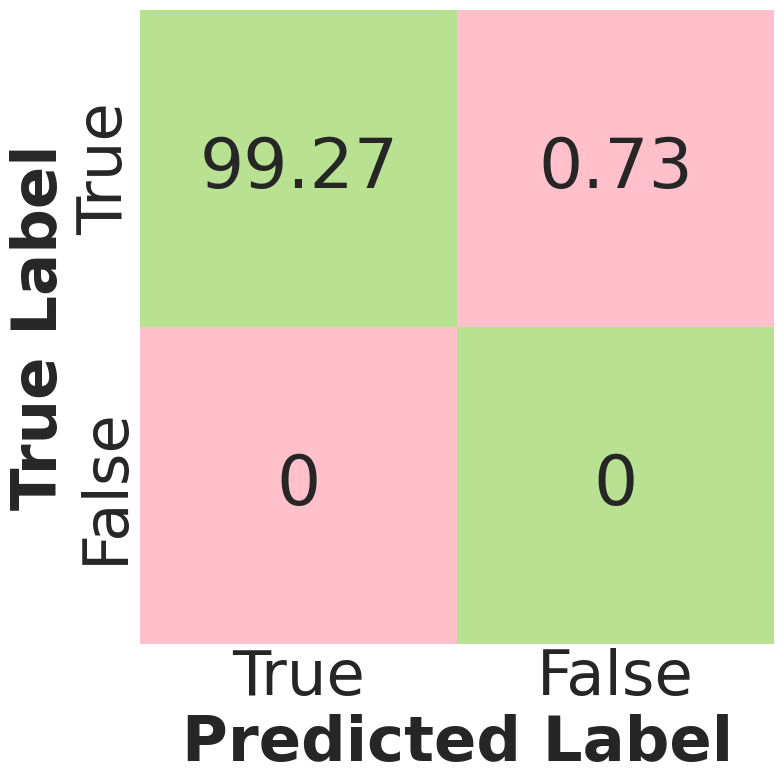

In [5]:
# YOLOv11n
cm1 = np.array([[accuracy_list['YOLOv11_Nano'][0], 100 - accuracy_list['YOLOv11_Nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['YOLOv11_Medium'][0], 100 - accuracy_list['YOLOv11_Medium'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['YOLOv11_XLarge'][0], 100 - accuracy_list['YOLOv11_XLarge'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm3,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_n_100_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_n_100_epochs.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_m_100_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_m_100_epochs.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_x_100_epochs.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_x_100_epochs.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

# New Custom Trained YOLOv11 - 50 epochs

In [5]:
def calculatePercentiles(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)
    
def getFolderName(folder):
    if folder.split("_")[1] == "yolov11n":
        return "YOLOv11_Nano"
    elif folder.split("_")[1] == "yolov11m":
        return "YOLOv11_Medium"
    else:
        return "YOLOv11_XLarge"

In [9]:
accuracy_list = dict()

filename = "bad_light"
df_combined=pd.DataFrame()

for folder in ["scratch_yolov11n_50_epochs","scratch_yolov11m_50_epochs","scratch_yolov11x_50_epochs"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
    df_temp['run']*=1000
    df_temp["model"] = getFolderName(folder)
    calculatePercentiles(df_temp, getFolderName(folder))
    df_combined = pd.concat([df_combined, df_temp[["run", "model"]]])

df_combined.reset_index(drop=True)
print(accuracy_list)

YOLOv11_Nano
Total Correct Predictions :  3704
Total Rows :  3806
YOLOv11_Medium
Total Correct Predictions :  3654
Total Rows :  3806
YOLOv11_XLarge
Total Correct Predictions :  3302
Total Rows :  3806
{'YOLOv11_Nano': (97.32, 3704, 3806), 'YOLOv11_Medium': (96.01, 3654, 3806), 'YOLOv11_XLarge': (86.76, 3302, 3806)}


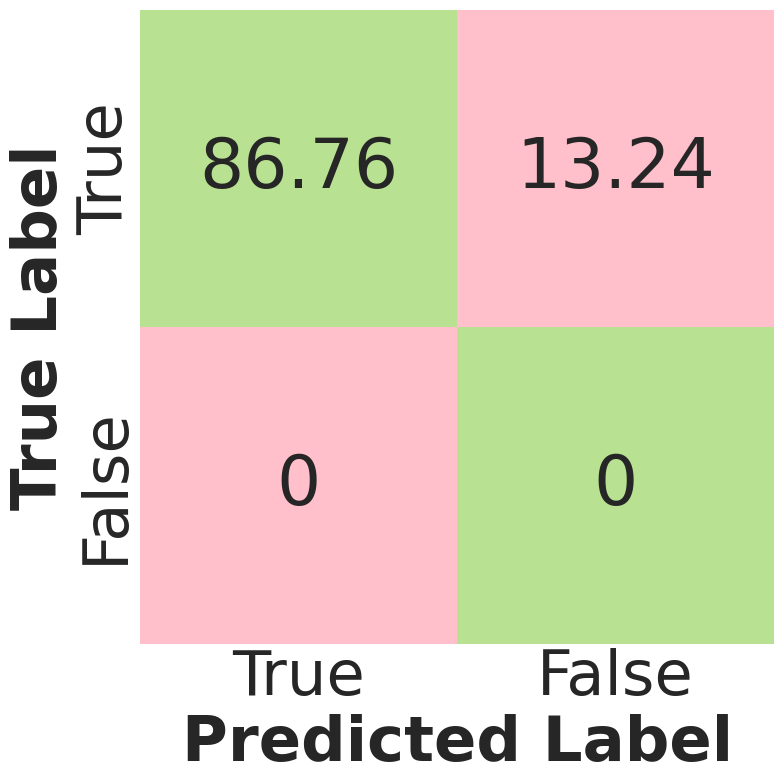

In [10]:
# YOLOv11n
cm1 = np.array([[accuracy_list['YOLOv11_Nano'][0], 100 - accuracy_list['YOLOv11_Nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['YOLOv11_Medium'][0], 100 - accuracy_list['YOLOv11_Medium'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['YOLOv11_XLarge'][0], 100 - accuracy_list['YOLOv11_XLarge'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm3,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_n_50_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_n_50_epochs.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_m_50_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_m_50_epochs.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_x_50_epochs.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_x_50_epochs.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

# New Custom Trained YOLOv8 - 100 Epochs

## Adversarial

In [3]:
def calculatePercentiles(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)
    
def getFolderName(folder):
    if folder.split("_")[1] == "yolov8n":
        return "YOLOv8_Nano"
    elif folder.split("_")[1] == "yolov8m":
        return "YOLOv8_Medium"
    else:
        return "YOLOv8_XLarge"

In [4]:
accuracy_list = dict()

filename = "bad_light"
df_combined=pd.DataFrame()

for folder in ["scratch_yolov8n_100_epochs","scratch_yolov8m_100_epochs","scratch_yolov8x_100_epochs"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
    df_temp['run']*=1000
    df_temp["model"] = getFolderName(folder)
    calculatePercentiles(df_temp, getFolderName(folder))
    df_combined = pd.concat([df_combined, df_temp[["run", "model"]]])

df_combined.reset_index(drop=True)
print(accuracy_list)

YOLOv8_Nano
Total Correct Predictions :  3660
Total Rows :  3806
YOLOv8_Medium
Total Correct Predictions :  3731
Total Rows :  3806
YOLOv8_XLarge
Total Correct Predictions :  3734
Total Rows :  3806
{'YOLOv8_Nano': (96.16, 3660, 3806), 'YOLOv8_Medium': (98.03, 3731, 3806), 'YOLOv8_XLarge': (98.11, 3734, 3806)}


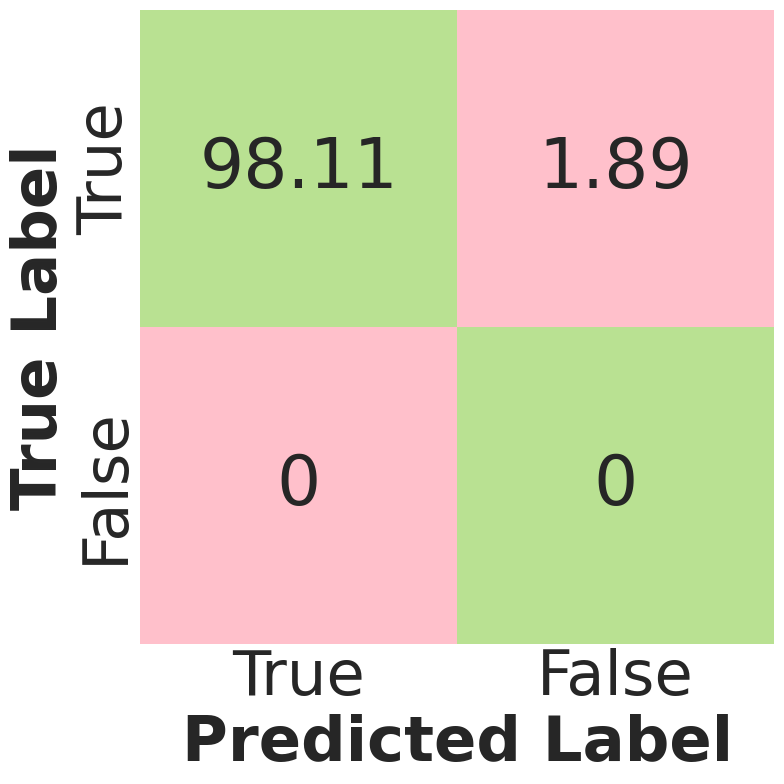

In [ ]:
# YOLOv11n
cm1 = np.array([[accuracy_list['YOLOv8_Nano'][0], 100 - accuracy_list['YOLOv8_Nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['YOLOv8_Medium'][0], 100 - accuracy_list['YOLOv8_Medium'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['YOLOv8_XLarge'][0], 100 - accuracy_list['YOLOv8_XLarge'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm3,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov8_n_100_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov8_n_100_epochs.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov8_m_100_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov8_m_100_epochs.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov8_x_100_epochs.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov8_x_100_epochs.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

## Diverse

In [3]:
def calculatePercentilesAllFolder(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)
    
def getFolderName(folder):
    if folder.split("_")[1] == "yolov8n":
        return "YOLOv8_Nano"
    elif folder.split("_")[1] == "yolov8m":
        return "YOLOv8_Medium"
    else:
        return "YOLOv8_XLarge"

In [4]:
df_all_model_combined = pd.DataFrame()
accuracy_list = dict()

for folder in ["scratch_yolov8n_100_epochs", "scratch_yolov8m_100_epochs", "scratch_yolov8x_100_epochs"]:
    df_folder_combined=pd.DataFrame()
    for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
        df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/{folder}/output_inference_time/{filename}.csv")
        df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
    df_folder_combined["model"] = getFolderName(folder)
    calculatePercentilesAllFolder(df_folder_combined, getFolderName(folder))
    df_all_model_combined = pd.concat([df_all_model_combined, df_folder_combined])
    

df_all_model_combined.reset_index(drop=True, inplace=True)
print(accuracy_list)

YOLOv8_Nano
Total Correct Predictions :  23336
Total Rows :  23554
YOLOv8_Medium
Total Correct Predictions :  23277
Total Rows :  23554
YOLOv8_XLarge
Total Correct Predictions :  23319
Total Rows :  23554
{'YOLOv8_Nano': (99.07, 23336, 23554), 'YOLOv8_Medium': (98.82, 23277, 23554), 'YOLOv8_XLarge': (99.0, 23319, 23554)}


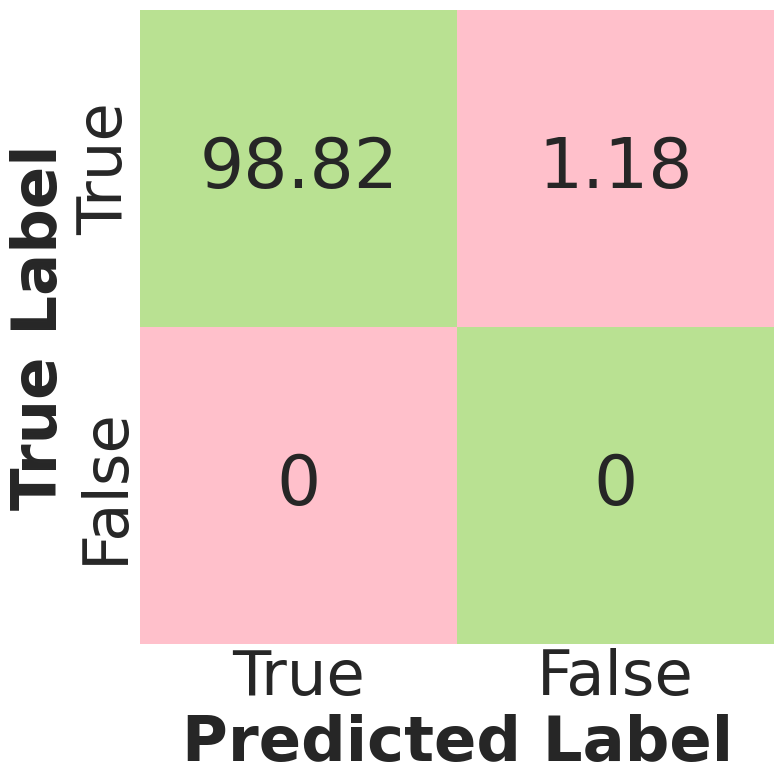

In [5]:
# YOLOv11n
cm1 = np.array([[accuracy_list['YOLOv8_Nano'][0], 100 - accuracy_list['YOLOv8_Nano'][0]],
                [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['YOLOv8_Medium'][0], 100 - accuracy_list['YOLOv8_Medium'][0]],
                [0, 0]])

# YOLOv11x
cm3 = np.array([[accuracy_list['YOLOv8_XLarge'][0], 100 - accuracy_list['YOLOv8_XLarge'][0]],
                [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm2,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov8_n_100_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov8_n_100_epochs.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov8_m_100_epochs.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov8_m_100_epochs.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov8_x_100_epochs.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov8_x_100_epochs.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

# YOLOv11 - Medium Trained on 1000 images

## Adversarial

In [5]:
def calculatePercentiles(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)
    
def getFolderName(folder):
    if folder.split("_")[1] == "yolov11n":
        return "YOLOv11_Nano"
    elif folder.split("_")[1] == "yolov11m":
        return "YOLOv11_Medium"
    else:
        return "YOLOv11_XLarge"


accuracy_list = dict()

filename = "bad_light"
df_combined=pd.DataFrame()

for folder in ["scratch_yolov11m_100_epochs_resized"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/4090_outputs/{folder}/output_inference_time/{filename}.csv")
    df_temp['run']*=1000
    df_temp["model"] = getFolderName(folder)
    calculatePercentiles(df_temp, getFolderName(folder))
    df_combined = pd.concat([df_combined, df_temp[["run", "model"]]])

df_combined.reset_index(drop=True)
print(accuracy_list)

YOLOv11_Medium
Total Correct Predictions :  2558
Total Rows :  3806
{'YOLOv11_Medium': (67.21, 2558, 3806)}


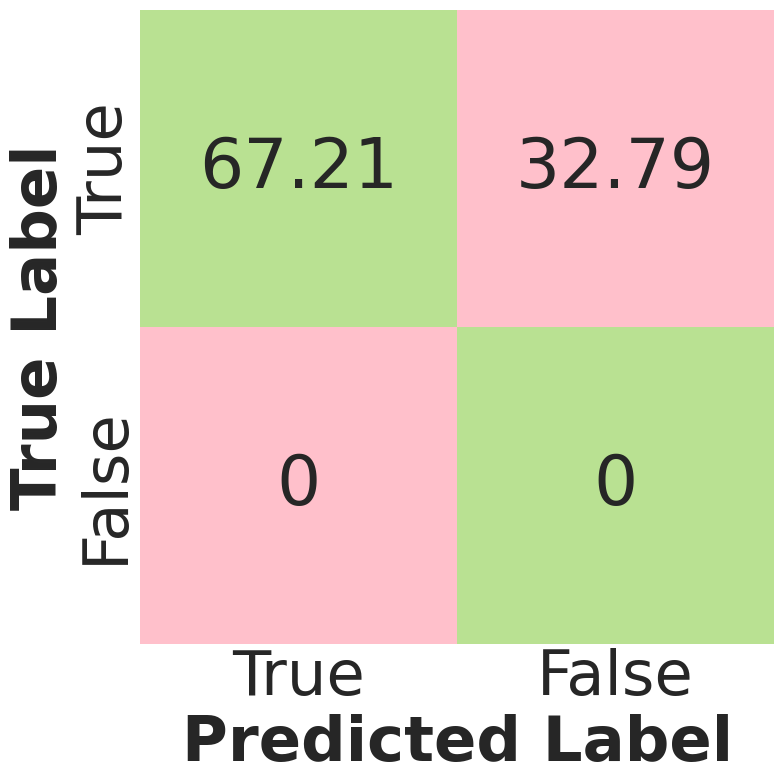

In [8]:
# YOLOv11n
# cm1 = np.array([[accuracy_list['YOLOv11_Nano'][0], 100 - accuracy_list['YOLOv11_Nano'][0]],
#                 [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['YOLOv11_Medium'][0], 100 - accuracy_list['YOLOv11_Medium'][0]],
                [0, 0]])

# YOLOv11x
# cm3 = np.array([[accuracy_list['YOLOv11_XLarge'][0], 100 - accuracy_list['YOLOv11_XLarge'][0]],
#                 [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm2,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_n_100_epochs_resized.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_n_100_epochs_resized.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_m_100_epochs_resized.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_m_100_epochs_resized.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_x_100_epochs_resized.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/adversarial/custom_yolov11_x_100_epochs_resized.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

## Diverse

In [11]:
def calculatePercentilesAllFolder(df, folder):
    print(folder)
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = correct/total*100
    accuracy_list[folder]=(round(percentage,2),correct, total)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)
    
def getFolderName(folder):
    if folder.split("_")[1] == "yolov11n":
        return "YOLOv11_Nano"
    elif folder.split("_")[1] == "yolov11m":
        return "YOLOv11_Medium"
    else:
        return "YOLOv11_XLarge"


df_all_model_combined = pd.DataFrame()
accuracy_list = dict()

for folder in ["scratch_yolov11m_100_epochs_resized"]:
    df_folder_combined=pd.DataFrame()
    for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
        df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/4090_outputs/{folder}/output_inference_time/{filename}.csv")
        df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
    df_folder_combined["model"] = getFolderName(folder)
    calculatePercentilesAllFolder(df_folder_combined, getFolderName(folder))
    df_all_model_combined = pd.concat([df_all_model_combined, df_folder_combined])
    

df_all_model_combined.reset_index(drop=True, inplace=True)
print(accuracy_list)

YOLOv11_Medium
Total Correct Predictions :  21913
Total Rows :  23554
{'YOLOv11_Medium': (93.03, 21913, 23554)}


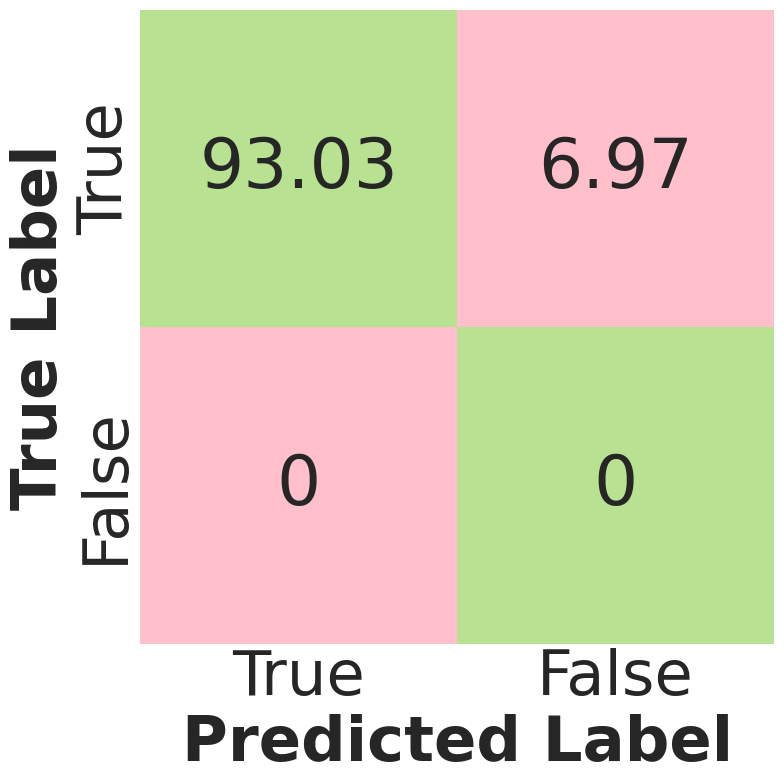

In [12]:
# YOLOv11n
# cm1 = np.array([[accuracy_list['YOLOv11_Nano'][0], 100 - accuracy_list['YOLOv11_Nano'][0]],
#                 [0, 0]])

# YOLOv11m
cm2 = np.array([[accuracy_list['YOLOv11_Medium'][0], 100 - accuracy_list['YOLOv11_Medium'][0]],
                [0, 0]])

# YOLOv11x
# cm3 = np.array([[accuracy_list['YOLOv11_XLarge'][0], 100 - accuracy_list['YOLOv11_XLarge'][0]],
#                 [0, 0]])


fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(np.eye(2),
            annot = cm2,            #To be changed for plotting confusion matrix for the given model
            fmt = 'g',
            annot_kws = {'size': 50},
            cmap = sns.color_palette(
                ['pink','#f8b8d0','pink', '#b9e192'],
                as_cmap = True
                ),
            cbar = False,
            yticklabels = ['True', 'False'],
            xticklabels = ['True', 'False'],
            ax = ax,
            )
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.tick_params(labelsize = 45, length = 0)

ax.set_xlabel('Predicted Label', size = 45, weight = 'bold')
ax.set_ylabel('True Label', size = 45, weight = 'bold')

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_n_100_epochs_resized.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_n_100_epochs_resized.pdf", bbox_inches="tight")

plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_m_100_epochs_resized.png", bbox_inches="tight")
plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_m_100_epochs_resized.pdf", bbox_inches="tight")

# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_x_100_epochs_resized.png", bbox_inches="tight")
# plt.savefig(f"/home/drone/Downloads/IPDPS/accuracy/AGX/homogeneous/custom_yolov11_x_100_epochs_resized.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

# Bar Plot

### Y-axis = True Positives
### X-axis = Model
### Hue    = DataSet (Adversarial/Diverse)

In [55]:
bar_df = pd.DataFrame(columns=['Dataset','category','TP'])

In [56]:
def calculatePercentiles(df):
    correct=int(df['class'].count())
    total = len(df['class'])
    percentage = round(correct/total*100,2)
    print("Total Correct Predictions : ", correct)
    print("Total Rows : ", total)
    print("Percentage : ", percentage)
    df["TP"]=percentage

## Scratch Trained YOLOv11 - 100 Epochs - 3.8k Images

### Adversarial

In [29]:
accuracy_list = dict()

filename = "bad_light"

df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/scratch_yolov11m_100_epochs/output_inference_time/{filename}.csv")
calculatePercentiles(df_temp)
bar_df.loc[0] = ["New","Adversarial",df_temp["TP"].values[0]]

Total Correct Predictions :  3757
Total Rows :  3806
Percentage :  98.71


### Diverse

In [30]:
df_folder_combined=pd.DataFrame()
for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/scratch_yolov11m_100_epochs/output_inference_time/{filename}.csv")
    df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
calculatePercentiles(df_folder_combined)
bar_df.loc[1] = ["New","Diverse",df_folder_combined["TP"].values[0]]

Total Correct Predictions :  23435
Total Rows :  23554
Percentage :  99.49


## New Trained YOLOv11 - 100 Epochs - 3.8k Images

### Adversarial

In [57]:
accuracy_list = dict()

filename = "bad_light"

df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/new_yolov11_medium_50_epochs/output_inference_time/{filename}.csv")
calculatePercentiles(df_temp)
bar_df.loc[0] = ["New","Adversarial",df_temp["TP"].values[0]]

Total Correct Predictions :  3786
Total Rows :  3806
Percentage :  99.47


### Diverse

In [58]:
df_folder_combined=pd.DataFrame()
for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/new_yolov11_medium_50_epochs/output_inference_time/{filename}.csv")
    df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
calculatePercentiles(df_folder_combined)
bar_df.loc[1] = ["New","Diverse",df_folder_combined["TP"].values[0]]

Total Correct Predictions :  23398
Total Rows :  23554
Percentage :  99.34


## Old Trained YOLOv11 - 1k Images

In [59]:
filename = "bad_light"

df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/resized_new_yolov11_m_50_epochs/output_inference_time/{filename}.csv")
calculatePercentiles(df_temp)
bar_df.loc[2] = ["Old","Adversarial",df_temp["TP"].values[0]]

Total Correct Predictions :  2825
Total Rows :  3806
Percentage :  74.22


In [60]:
df_folder_combined=pd.DataFrame()
for filename in ["daylight", "Footpath_moving", "footpath_no_ped", "footpath_ped", "Path_cycle", "Path_ppl", "Path_ppl_cycle", "sor_moving", "sor_np", "sor_parked", "sor_ped"]:
    df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/AGX_outputs_yolo/resized_new_yolov11_m_50_epochs/output_inference_time/{filename}.csv")
    df_folder_combined = pd.concat([df_folder_combined, df_temp[["class"]]])
calculatePercentiles(df_folder_combined)
bar_df.loc[3] = ["Old","Diverse",df_folder_combined["TP"].values[0]]

Total Correct Predictions :  20629
Total Rows :  23554
Percentage :  87.58


In [61]:
print(bar_df)

  Dataset     category     TP
0     New  Adversarial  99.47
1     New      Diverse  99.34
2     Old  Adversarial  74.22
3     Old      Diverse  87.58


## Plot

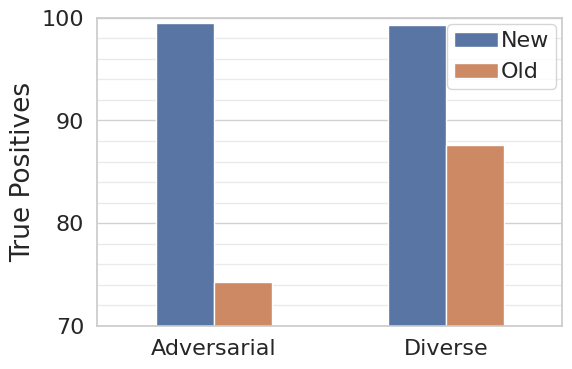

In [63]:
font_size = 16

plt.figure(figsize=(6, 4))  # Reduce width of figure to make x-ticks closer

ax = sns.barplot(
    x='category', 
    y='TP', 
    hue='Dataset', 
    data=bar_df,
    width=0.5
)

# Add a legend
plt.legend(loc="upper right", fontsize=16, ncol = 1, borderpad=0.3,
           handletextpad=0.1, borderaxespad=0.3, columnspacing=0.5)

# Set title and labels
plt.ylabel("True Positives", fontsize=19)
plt.xlabel("", fontsize=font_size)

# Customize Y-axis
plt.ylim(70, 100)
# ax.set_yticks(np.arange(0, 1200, 200))
ax.set_yticks([70.0,80.0,90.0,100.0])
ax.tick_params(axis='x', which='minor', bottom=False)
ax.yaxis.set_tick_params(labelsize=font_size)
ax.xaxis.set_tick_params(labelsize=font_size)

# Add grid
ax.grid(which='minor', axis='y', linestyle='-', alpha=0.4)
ax.grid(which='major', axis='y', linestyle='-', alpha=0.9)
plt.minorticks_on()

# # Reduce X-tick spacing by manually setting positions
xticks = ax.get_xticks()
# xticks = [0, 0.8, 1.6]  # Manually set positions
# plt.xticks(xticks, ax.get_xticklabels(), rotation=0, ha="center")

# Adjust spacing to make it tighter
# plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
# plt.margins(0.005)

# Save and show plot
# plt.tight_layout()
out_path = "/home/drone/Downloads/IPDPS/accuracy/"
outfile = out_path + "v11_medium_accuracy_bar.png"
plt.savefig(outfile, bbox_inches='tight')
plt.savefig(outfile.replace(".png", ".pdf"), format='pdf', bbox_inches='tight', dpi=700)

plt.show()